# 원-핫 인코딩(One-Hot Encoding)

원-핫 인코딩은 클래스 개수만큼 차원을 가지고 해당하는 클래스는 1, 아닌 클래스는 0을 가지는 표현 방법

이렇게 원-핫 인코딩으로 표현된 벡터를 원-핫 벡터라고 함

## 원-핫 벡터를 사용하는 이유

클래스를 단순하게 정수로 인코딩하는 경우 각 클래스에 대해 임의의 정수를 부여할 수 있다. 예를 들어 0, 1, 2또는 1, 2, 3, .. 등으로 간단히 인코딩한다. <br>

이 경우 손실 함수로 평균 제곱 오차인 MSE를 사용할 경우 실제값과 예측값의 차이가 클래스마다 달라진다. 따라서, 클래스 사이에 거리의 개념이 생기기 때문에 의도와 다르게 오차가 구해지게 된다. 그러나 항상 정수 인코딩이 틀린 것은 아니다.<br>

클래스별로 순서가 존재하는 경우에는 정수 인코딩의 거리가 유용하다. 리뷰 1~5점, 성적 A~F 등 다중 클래스이지만 순서가 있는 경우에는 정수 인코딩에 의한 거리정보가 유용하다.

## 원-핫 벡터의 무작위성

원-핫 인코딩을 거친 원-핫 벡터들은 모든 쌍에 대해서 거리를 구해도 모두 동일하다. 이러한 원-핫 벡터의 무작위성은 단어의 유사성을 구할 수 없다는 단점으로 언급된다.

# 소프트맥스 회귀(Softmax Regression)

## 다중 클래스 분류

로지스틱 회귀에서 시그모이드 함수는 예측값을 0 ~ 1의 값으로 만든다. 스팸 메일 분류기를 만들었을 때 0.75라는 값이 출력됐다면 스팸일 확률이 0.75 아닐 확률이 0.25라는 뜻으로 두 확률을 합하면 1이된다.

소프트맥스 회귀 또한 각 클래스마다의 확률이 값으로 출력되고 이를 모두 합하면 1이된다. 따라서 소프트맥스 회귀는 클래스의 개수만큼의 차원을 가진 벡터를 모든 원소의 합이 1이 되도록 변환시켜야한다. 변환할 때 사용하는 함수를 소프트맥스 함수라고 한다.

### 소프트맥스 함수

$$p_{i}=\frac{e^{z_{i}}}{\sum_{j=1}^{k} e^{z_{j}}}\ \ for\ i=1, 2, ... k$$

해당 원소의 값을 모든 원소의 합으로 나누면 $i$번째 클래스가 정답일 확률 $p$가 된다

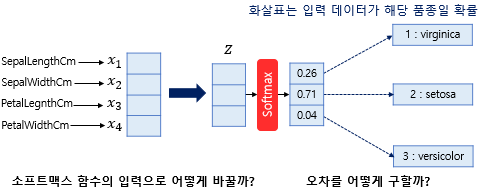

소프트맥스 함수의 입력 차원은 클래스의 개수와 같다. 따라서 위의 경우처럼 4개의 차원이 입력 데이터로 주어지고 클래스의 개수는 3개라면 4개의 차원을 3개의 차원의 벡터로 변환해야한다.

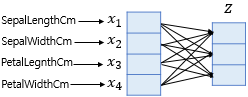

이 때 필요한 가중치는 4 * 3 = 12개가 된다.

소프트맥스의 출력값은 각 클래스에 대한 확률로 정의할 수 있다. 이에 대한 오차를 구하기 위해서는 정답 벡터를 원-핫으로 구성하여 오차를 계산할 수 있다.

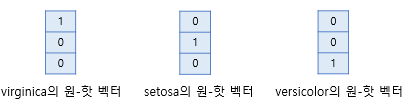

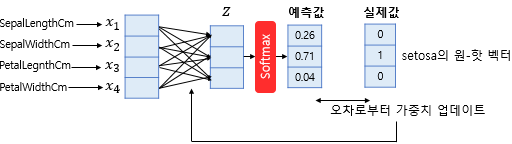

소프트맥스 회귀에서 오차를 구하기 위해서는 비용함수로 크로스 엔트로피 함수를 사용한다.
그렇게 구한 오차를 통해 앞의 가중치를 업데이트한다.

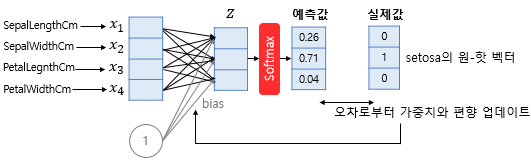

정확히는 가중치와 더불어 편향도 업데이트의 대상이 된다. 이를 행렬로 나타내면 다음과 같다.

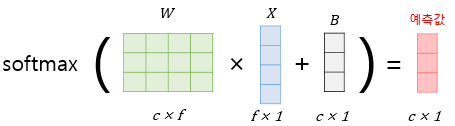

행렬의 크기
- 가중치 행렬 (클래스의 개수 X 특성의 개수) 
- 입력 데이터 (특성의 개수 X 1)
- 편향 (클래스의 개수 X 1)


### 크로스 엔트로피

소프트맥스에서는 비용 함수로 크로스 엔트로피 함수를 사용한다.

$$cost(W) = -\sum_{j=1}^{k}y_{j}\ log(p_{j})$$

하나의 데이터를 예측한 후 오차를 계산하는 크로스 엔트로피 함수식이다. 먼저 $k$는 클래스의 개수, $y_{j}$는 실제값의 원-핫 벡터의 $j$번째 인덱스값, $p_{j}$는 샘플 데이터가 $j$번째 클래스일 확률이다. 즉, 클래스의 개수만큼 로그함수가 통합되어있다. 

$$cost(W) = -(y\ logH(X) + (1-y)\ log(1-H(X)))$$

로지스틱 회귀에서의 오차함수 또한 $1-y$로 다른 클래스의 값을 표현했을 뿐, 크로스 엔트로피 함수와 동일하다.

즉, 크로스 엔트로피는 소프트맥스 회귀와 로지스틱 회귀에서 사용되는 오차 함수이다. 로지스틱 회귀의 경우 두 개의 클래스만 존재하는 이진분류 문제이기 때문에 하나의 클래스로 다른 클래스의 확률을 표현할 수 있다. 그래서 위의 식과 같이 표현 가능하다.